### Steps
#### Load Data -->  Pickele file
#### Balance Data -->  SMOTE
#### Dimentionality Reduciton -->  PCA
#### Model Training -->  Comparision

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier 
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

### Load Data

In [2]:
original_csv_path_x = 'samples/data.csv'
original_csv_path_y = 'samples/labels.csv'

In [3]:
## serialization & deserialization for faster loading

data_x = pd.read_csv(original_csv_path_x)

In [4]:
data_x = data_x.drop(data_x.columns[0],axis=1)

In [5]:
data_x.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [6]:
data_x.to_pickle('x_feat.pkl')

In [7]:
data_y = pd.read_csv(original_csv_path_y)

In [8]:
data_y.head()

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


In [9]:
data_y = data_y.drop(data_y.columns[0],axis=1)

In [10]:
data_y.to_pickle('y_feat.pkl')

### Balacing the data

In [11]:
x = pd.read_pickle('x_feat.pkl')
y = pd.read_pickle('y_feat.pkl')

In [12]:
freq = y.value_counts()
# print(freq.index)
labels = []

for e in freq.index:
    print(e[0])
    labels.append(e[0])

BRCA
KIRC
LUAD
PRAD
COAD


In [13]:
freq.values

array([300, 146, 141, 136,  78])

/var/folders/hd/25__q2rn1yb9855zckz30xrm0000gn/T/ipykernel_48789/1897865952.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=counts, palette="viridis")


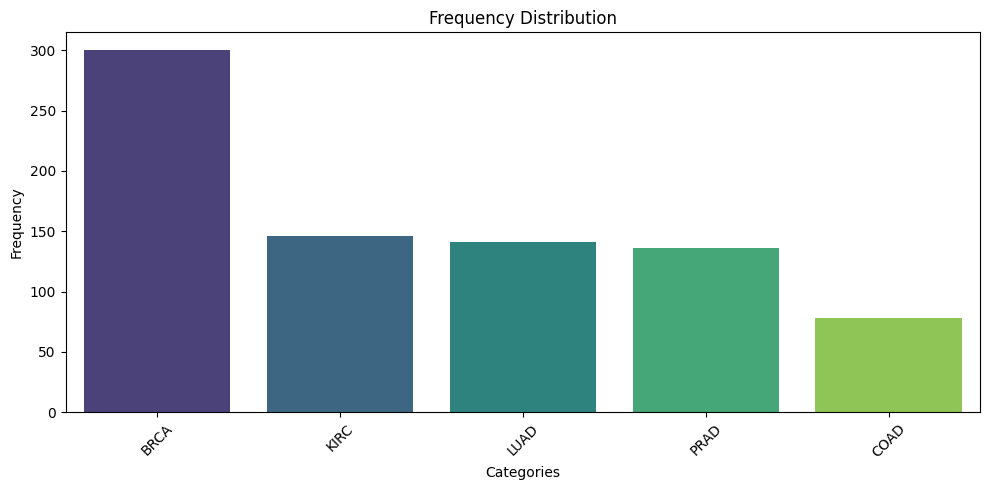

In [14]:
# Convert the index and values of `freq` into separate variables
counts = freq.values

# Plot using Seaborn
plt.figure(figsize=(10, 5))  # Set the figure size
sns.barplot(x=labels, y=counts, palette="viridis")

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Frequency Distribution')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()

# Show the plot
plt.show()

### Remarks : There is imbalance in the data

In [15]:
Counter(y.iloc[:,0])

Counter({'BRCA': 300, 'KIRC': 146, 'LUAD': 141, 'PRAD': 136, 'COAD': 78})

In [17]:
from imblearn.over_sampling import SMOTE
# Check original class distribution
print("Original class distribution:", Counter(y.iloc[:,0]))

# Apply SMOTE
smote = SMOTE(sampling_strategy = 'not majority',random_state=42)
X_resampled, y_resampled = smote.fit_resample(x, y)

# Check new class distribution


Original class distribution: Counter({'BRCA': 300, 'KIRC': 146, 'LUAD': 141, 'PRAD': 136, 'COAD': 78})


In [18]:
print("Resampled class distribution:", Counter(y_resampled.iloc[:,0]))


Resampled class distribution: Counter({'PRAD': 300, 'LUAD': 300, 'BRCA': 300, 'KIRC': 300, 'COAD': 300})


### Dimentionality Reduction

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)  # Standardize the dataset


In [21]:
pca = PCA(n_components=8)  
X_pca = pca.fit_transform(X_scaled)

print(f"Original shape: {X_scaled.shape}")
print(f"Reduced shape: {X_pca.shape}")


Original shape: (1500, 20531)
Reduced shape: (1500, 8)


In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [23]:
y_data = le.fit_transform(y_resampled)

/Users/abirbera/Developer/college/projects/Major_project/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Model training

In [24]:
def model_performace(name,model, params,x_train,y_train,x_test,y_test):
    grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy')
    grid_search.fit(x_train,y_train)
    y_pred = grid_search.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    return accuracy

In [26]:
### Model List
lgr = LogisticRegression()
rf = RandomForestClassifier()
adb = AdaBoostClassifier()
xgb = XGBClassifier()
lgb = LGBMClassifier()
gb = GradientBoostingClassifier()

In [27]:
## params for LR
param_grid_lr = {
    'C': [0.01, 0.1, 1],
    'solver': ['newton-cg', 'lbfgs'],
    'penalty': ['l2'],
}

In [28]:
## params for RF
param_grid_rf ={
    'criterion':["gini","entropy"],
    "max_depth":[1,3,5,8,],
    'max_features': [None, 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}

In [29]:
## Params for AB
param_grid_AB = {
    'n_estimators':[1,20,50,100],
    'learning_rate':[0.001,0.01,0.1,1.0]
}

In [30]:
## params for GB
param_grid_GB = {
    'loss':['log_loss','exponential'],
    'n_estimators': [10,50,100],
    'learning_rate':[0.01,0.1,1]
}

In [ ]:
## params for SVM
# param_grid_svm = {
#     'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
#     'kernel': ['linear', 'rbf', 'poly'],  # Kernel types
#     'gamma': ['scale', 'auto'],  # Kernel coefficient
#     'degree': [2, 3, 4],  # Only for 'poly' kernel
#     'shrinking': [True, False],  # Whether to use shrinking heuristic
#     'class_weight': [None, 'balanced'],  # Handling imbalanced classes
# }

In [ ]:
## params for NB
# param_grid_nb = {
# }

In [31]:
param_grid_XGB = { 
    'n_estimators': [20, 50,100],           
    'learning_rate': [0.01, 0.1, 0.2],           
    'max_depth': [3, 6, 10],                      
    'eval_metric':['mlogloss','logloss']}

In [32]:
param_grid_lgb = {
'num_leaves' : [50,70,100],
'objective':['multiclass','multiclassova'],
'max_depth': [3, 6, 8],                
}

In [33]:
models = [
    { 'name': 'LR',
        'model': lgr,
        'params' : param_grid_lr
    },
    { 'name': 'RF',
        'model': rf,
        'params' : param_grid_rf
    },
    { 'name': 'GB',
        'model': gb,
        'params' : param_grid_GB
    },
    { 'name': 'XGB',
        'model': xgb,
        'params' : param_grid_XGB
    },
    { 'name': 'AB',
        'model': adb,
        'params' : param_grid_AB
    },
    { 'name': 'LGBM',
        'model': lgb,
        'params' : param_grid_lgb
    },
]

In [34]:
test_sizes = [0.1,0.25,0.33,0.4,0.50]

In [ ]:
result = []
for test_size in test_sizes:
    x_train, x_test, y_train, y_test = train_test_split(X_pca, y_data,test_size= test_size,random_state=42)
    x_train1, x_val, y_train1, y_val = train_test_split(x_train, y_train,test_size= 0.10,random_state=42)
    test_accuracy_list = []
    train_accuracy_list = []
    for model in models:
        print('-' * 200)
        test_acc = model_performace(name=model['name'],model=model['model'],params=model['params'],x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)
        train_acc = model_performace(name=model['name'],model=model['model'],params=model['params'],x_train=x_train,x_test=x_val,y_train=y_train,y_test=y_val)
        test_accuracy_list.append({
            model['name'] : test_acc
        })
        train_accuracy_list.append({
            model['name'] : train_acc
        })
    result.append({
        'test_size':test_size,
        'train_accuracy': train_accuracy_list,
        'test_accuracy' : test_accuracy_list
    })

In [37]:
result

[{'test_size': 0.1,
  'train_accuracy': [{'LR': 1.0},
   {'RF': 1.0},
   {'GB': 1.0},
   {'XGB': 1.0},
   {'AB': 0.8962962962962963},
   {'LGBM': 1.0}],
  'test_accuracy': [{'LR': 1.0},
   {'RF': 1.0},
   {'GB': 1.0},
   {'XGB': 1.0},
   {'AB': 0.9333333333333333},
   {'LGBM': 1.0}]},
 {'test_size': 0.25,
  'train_accuracy': [{'LR': 1.0},
   {'RF': 1.0},
   {'GB': 1.0},
   {'XGB': 1.0},
   {'AB': 0.8938053097345132},
   {'LGBM': 1.0}],
  'test_accuracy': [{'LR': 1.0},
   {'RF': 0.9973333333333333},
   {'GB': 0.992},
   {'XGB': 0.992},
   {'AB': 0.9253333333333333},
   {'LGBM': 1.0}]},
 {'test_size': 0.33,
  'train_accuracy': [{'LR': 1.0},
   {'RF': 1.0},
   {'GB': 1.0},
   {'XGB': 1.0},
   {'AB': 0.9108910891089109},
   {'LGBM': 1.0}],
  'test_accuracy': [{'LR': 0.9939393939393939},
   {'RF': 0.9919191919191919},
   {'GB': 0.9858585858585859},
   {'XGB': 0.9858585858585859},
   {'AB': 0.9151515151515152},
   {'LGBM': 0.9878787878787879}]},
 {'test_size': 0.4,
  'train_accuracy': [{'LR'

In [38]:
result[0]

{'test_size': 0.1,
 'train_accuracy': [{'LR': 1.0},
  {'RF': 1.0},
  {'GB': 1.0},
  {'XGB': 1.0},
  {'AB': 0.8962962962962963},
  {'LGBM': 1.0}],
 'test_accuracy': [{'LR': 1.0},
  {'RF': 1.0},
  {'GB': 1.0},
  {'XGB': 1.0},
  {'AB': 0.9333333333333333},
  {'LGBM': 1.0}]}

In [43]:
model_names = [list(item.keys())[0] for item in result[0]['train_accuracy']]

In [44]:
model_names

['LR', 'RF', 'GB', 'XGB', 'AB', 'LGBM']

In [62]:
result[2]['test_accuracy'][0]['LR']

0.9939393939393939

In [119]:
len(model_names)

6

In [120]:
mean_train_acc_list = []
mean_test_acc_list = []
for i in range(0,len(model_names)):
    mean_test_acc = 0
    mean_train_acc = 0
    for instance in result:
        print(f'model {model_names[i]} instance {instance['test_size']} {instance['test_accuracy'][i][model_names[i]]}')
        mean_test_acc += instance['test_accuracy'][i][model_names[i]]
        mean_train_acc += instance['train_accuracy'][i][model_names[i]]
    mean_train_acc_list.append((mean_train_acc/len(result)))
    mean_test_acc_list.append((mean_test_acc/len(result)))


model LR instance 0.1 1.0
model LR instance 0.25 1.0
model LR instance 0.33 0.9939393939393939
model LR instance 0.4 0.9933333333333333
model LR instance 0.5 0.9946666666666667
model RF instance 0.1 1.0
model RF instance 0.25 0.9973333333333333
model RF instance 0.33 0.9919191919191919
model RF instance 0.4 0.9933333333333333
model RF instance 0.5 0.9933333333333333
model GB instance 0.1 1.0
model GB instance 0.25 0.992
model GB instance 0.33 0.9858585858585859
model GB instance 0.4 0.99
model GB instance 0.5 0.9866666666666667
model XGB instance 0.1 1.0
model XGB instance 0.25 0.992
model XGB instance 0.33 0.9858585858585859
model XGB instance 0.4 0.9883333333333333
model XGB instance 0.5 0.98
model AB instance 0.1 0.9333333333333333
model AB instance 0.25 0.9253333333333333
model AB instance 0.33 0.9151515151515152
model AB instance 0.4 0.865
model AB instance 0.5 0.8813333333333333
model LGBM instance 0.1 1.0
model LGBM instance 0.25 1.0
model LGBM instance 0.33 0.9878787878787879
m

In [121]:
print(model_names)
print(mean_test_acc_list)
print(mean_test_acc_list)

['LR', 'RF', 'GB', 'XGB', 'AB', 'LGBM']
[0.9963878787878787, 0.9951838383838384, 0.9909050505050505, 0.9892383838383839, 0.904030303030303, 0.9940424242424243]
[0.9963878787878787, 0.9951838383838384, 0.9909050505050505, 0.9892383838383839, 0.904030303030303, 0.9940424242424243]


In [122]:
summary = {
    'model' : [model for model in model_names],
    'training accuracy' : [i for i in mean_train_acc_list],
    'testing accuracy' : [i for i in mean_test_acc_list]
}

In [123]:
summary_df = pd.DataFrame(summary)

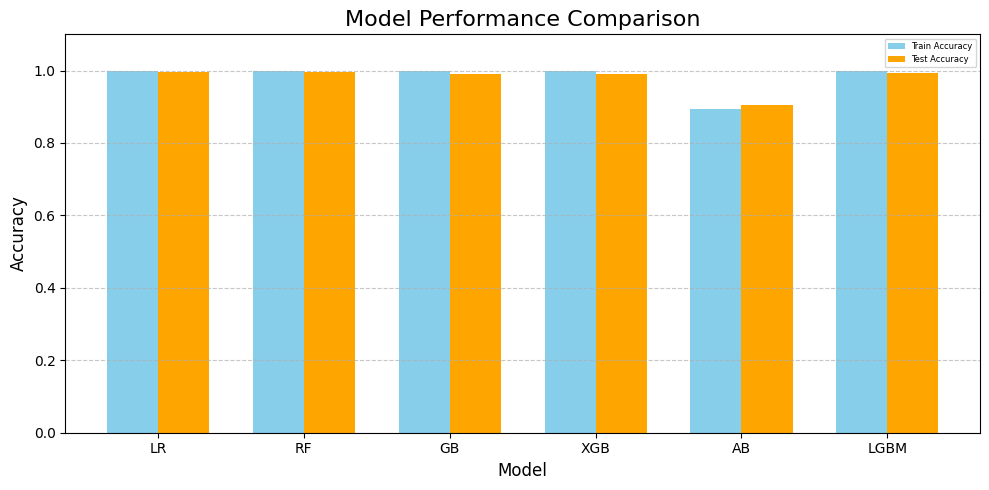

In [165]:
x = np.arange(len(summary_df['model']))  # Create positions for bars
width = 0.35  # Width of the bars

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Plot training accuracy
bars1 = ax.bar(x - width/2, summary_df['training accuracy'], width, label='Train Accuracy', color='skyblue')

# Plot test accuracy
bars2 = ax.bar(x + width/2, summary_df['testing accuracy'], width, label='Test Accuracy', color='orange')

# Add labels, title, and legend
ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Model Performance Comparison', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(summary_df['model'], fontsize=10)
ax.legend(fontsize=6)

# Add a grid
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.ylim(0, 1.1)  # Ensure the y-axis covers the range 0-1
plt.tight_layout()
plt.show()

In [143]:
test_acc_list_by_size = []
train_acc_list_by_size = []


for instance in result:
    test_acc_by_size = 0
    train_acc_by_size = 0
    for item in instance['train_accuracy']:
        train_acc_by_size += list(item.values())[0]
        # train_acc_by_size += item.value
    for item in instance['test_accuracy']:
        test_acc_by_size += list(item.values())[0]
    train_acc_by_size /= len(model_names)
    test_acc_by_size /= len(model_names)
    test_acc_list_by_size.append(test_acc_by_size)
    train_acc_list_by_size.append(train_acc_by_size)


In [144]:
print(train_acc_list_by_size)
print(test_acc_list_by_size)

[0.9827160493827161, 0.9823008849557522, 0.9851485148514851, 0.974074074074074, 0.9866666666666667]
[0.9888888888888889, 0.9844444444444443, 0.9767676767676768, 0.9702777777777779, 0.9711111111111111]


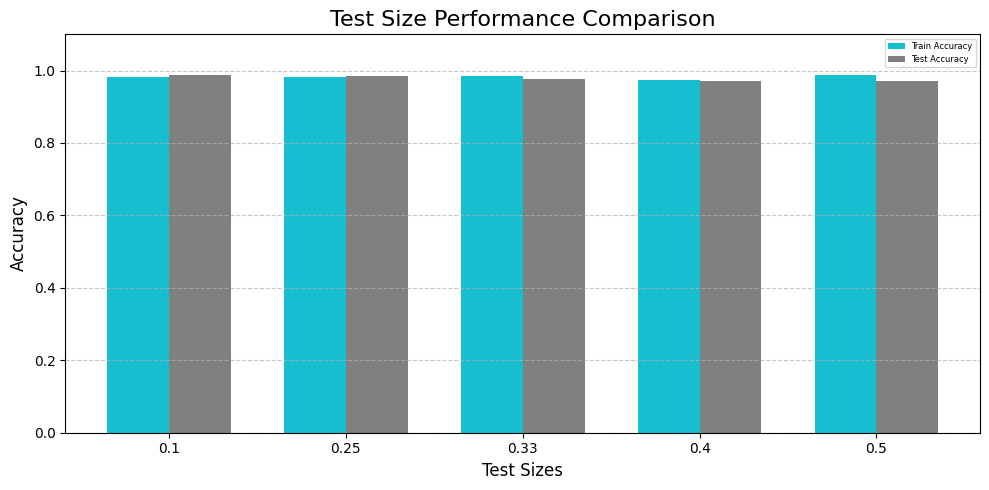

In [164]:
x = np.arange(len(result))  # Create positions for bars
width = 0.35  # Width of the bars

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Plot training accuracy
bars1 = ax.bar(x - width/2, train_acc_list_by_size, width, label='Train Accuracy', color='#17becf')

# Plot test accuracy
bars2 = ax.bar(x + width/2, test_acc_list_by_size, width, label='Test Accuracy', color='grey')

# Add labels, title, and legend
ax.set_xlabel('Test Sizes', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Test Size Performance Comparison', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(test_sizes, fontsize=10)
ax.legend(fontsize=6)

# Add a grid
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.ylim(0, 1.1)  # Ensure the y-axis covers the range 0-1
plt.tight_layout()
plt.show()